In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('E:\\Python\\AI\\Project\\EndtoEnd\\Notebook\\Data\\stud.csv')

In [34]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

<Axes: >

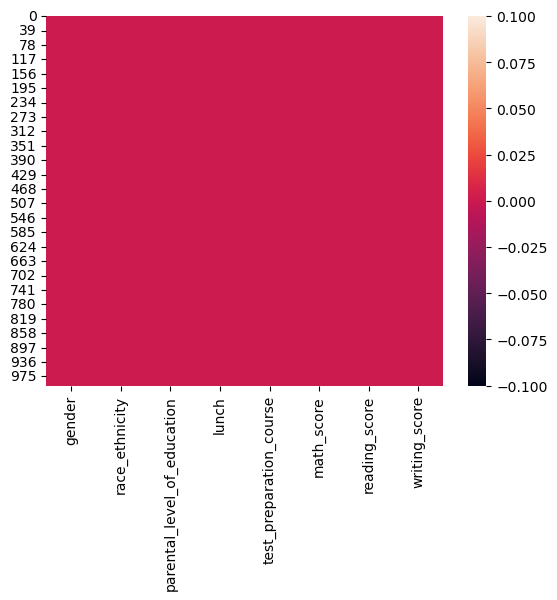

In [23]:
sns.heatmap(df.isna())

In [24]:
df.duplicated().sum()

0

In [26]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [30]:
categorical = [col for col in df.columns if df.dtypes[col] == 'object']
categorical

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [42]:
numerical = [col for col in df.columns if df.dtypes[col] != 'object']
numerical

['math_score', 'reading_score', 'writing_score']

In [33]:
#Each unique valoe for the categorical
for i in categorical:
    print("The unique values for the column {0} is {1}".format(i, df[i].unique()))

The unique values for the column gender is ['female' 'male']
The unique values for the column race_ethnicity is ['group B' 'group C' 'group A' 'group D' 'group E']
The unique values for the column parental_level_of_education is ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The unique values for the column lunch is ['standard' 'free/reduced']
The unique values for the column test_preparation_course is ['none' 'completed']


In [43]:
df[numerical].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


<Axes: >

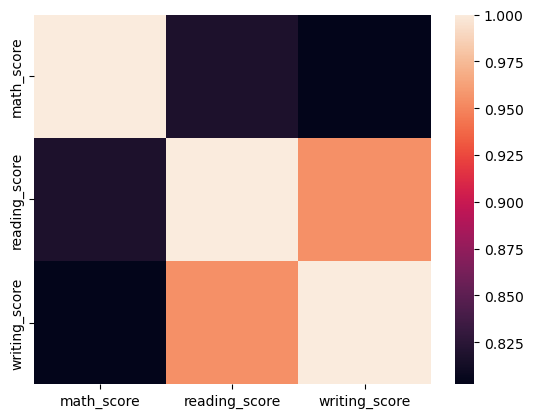

In [46]:
sns.heatmap(df[numerical].corr(), cbar = True)

In [58]:
#Creating featire value for total number and average number
df["Total_Score"] = df['math_score'] + df['reading_score'] + df['writing_score']
print("Total Value", df["Total_Score"])
df["average_Score"]  = df["Total_Score"]/3
print("Average Value: ", df["average_Score"])

Total Value 0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: Total_Score, Length: 1000, dtype: int64
Average Value:  0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average_Score, Length: 1000, dtype: float64


In [68]:
df = df.drop('Total number',axis=1)

In [69]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


<Axes: >

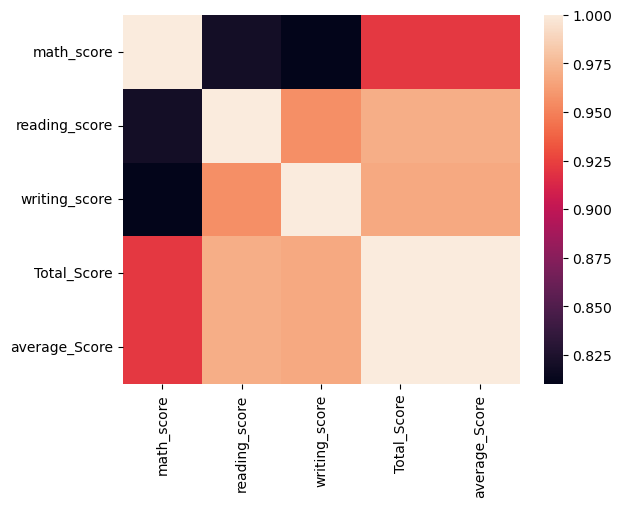

In [73]:
numerical = [col for col in df.columns if df.dtypes[col] != 'object']
sns.heatmap(df[numerical].corr(), cbar = True)

<Axes: xlabel='gender', ylabel='count'>

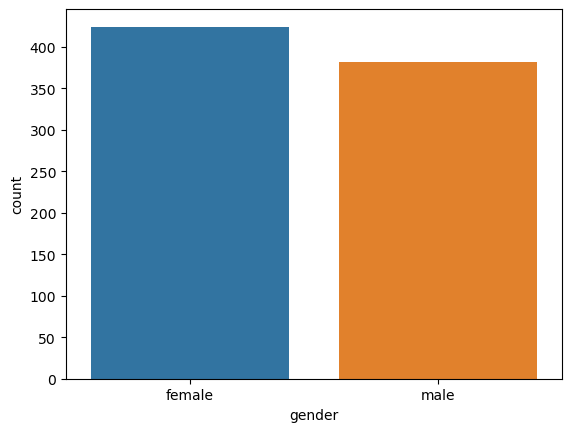

In [80]:
#number of male and female students in the dataset
sns.countplot(df, x = 'gender')

count    806.000000
mean      67.595120
std       14.393676
min        9.000000
25%       58.333333
50%       68.166667
75%       77.333333
max      100.000000
Name: average_Score, dtype: float64


C:\Users\sajib\AppData\Local\Temp\ipykernel_3780\3770582848.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_Score'], color='g', bins=100, hist_kws={'alpha': 0.4})
c:\Users\sajib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='average_Score', ylabel='Density'>

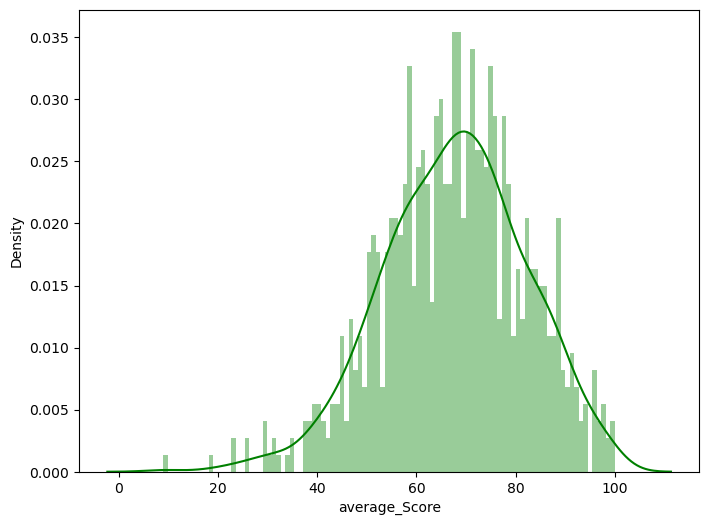

In [81]:
print(df['average_Score'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(df['average_Score'], color='g', bins=100, hist_kws={'alpha': 0.4})